#Part a

In [1]:
#Load exdata1 Data use np.loadtxt

import numpy as np
data = np.loadtxt('ex2data1.txt')
#X=data
#y=data

data1 = []
data2 = []
value = []
for i in data:
    data1.append(i.item(0))
    data2.append(i.item(1))
    value.append(i.item(2))

print(data1)
X_value=np.array([data1])
Y_value=np.array([data2])
y2 = np.array([value])
y2 = y2.T
X2= np.hstack((X_value.T,Y_value.T)) 
X=X2
y=y2
#for i in data:
#    result =np.delete(i,2)
#    X2 = np.hstack((X2,result))

print(X2)
#print(X)
#y = value
#pos = np.where(y == 1)
#neg = np.where(y == 0)
#print(X[pos, 0]) 
#print(data[pos, 1])


[34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605, 45.08327748, 61.10666454, 75.02474557, 76.0987867, 84.43281996, 95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914, 53.97105215, 69.07014406, 67.94685548, 70.66150955, 76.97878373, 67.37202755, 89.67677575, 50.53478829, 34.21206098, 77.92409145, 62.27101367, 80.19018075, 93.1143888, 61.83020602, 38.7858038, 61.37928945, 85.40451939, 52.10797973, 52.04540477, 40.23689374, 54.63510555, 33.91550011, 64.17698887, 74.78925296, 34.18364003, 83.90239366, 51.54772027, 94.44336777, 82.36875376, 51.04775177, 62.22267576, 77.19303493, 97.77159928, 62.0730638, 91.5649745, 79.94481794, 99.27252693, 90.54671411, 34.52451385, 50.28649612, 49.58667722, 97.64563396, 32.57720017, 74.24869137, 71.79646206, 75.39561147, 35.28611282, 56.2538175, 30.05882245, 44.66826172, 66.56089447, 40.45755098, 49.07256322, 80.27957401, 66.74671857, 32.72283304, 64.03932042, 72.34649423, 60.45788574, 58.84095622, 99.8278578, 47.26426911, 50.45

#Visualize the Data

Your plot should look like the figure below, exact markers and colors are not important as long as labels and legend are correct

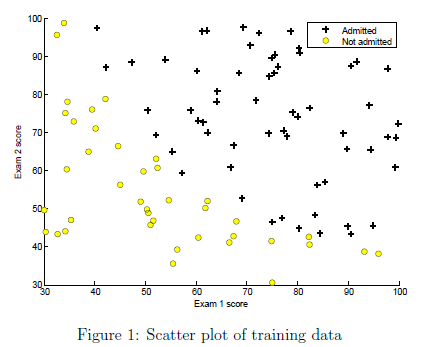

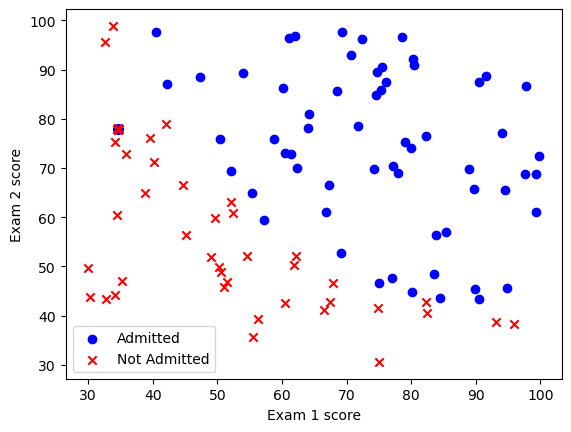

In [2]:
#Import relevant library to plot the data
from pylab import scatter, show, legend, xlabel, ylabel
pos = np.where(y == 1)
neg = np.where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
#print(X[pos, 0], X[pos, 1])
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Admitted', 'Not Admitted'])
show()

#Sigmoid Function

Logistic Regression Hypothesis and Sigmoid function is given below and implementation is given in MATLAB, write the function for sigmoid below

\begin{align}
\ h_{\theta}(x) = g(\theta^Tx),.
\end{align}



\begin{align}
        g(z) = \frac{1}{1+e^{-z}}
\end{align}

In [3]:
#WRITE FUNCTION HERE

def sigmoid(X):
    '''Compute the sigmoid function '''
    return 1/(1+np.exp(-X))



In [4]:
#Provide input values to the sigmoid function below and run to check the function
sigmoid(0)

0.5

#Cost Function and Gradient

The logistic regression cost function and gradient is given below.

\begin{align}
        J(\theta) =\frac{1}{m}\sum_{i=1}^m[-y^{(i)}\log(h_{\theta}(x^{(i)}))- (1 -y^{(i)})\log(1- h_{\theta}(x^{(i)}))
\end{align}

\begin{align}
    \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m( h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{align}

In [5]:
#WRITE THE COST AND GRADIENT FUNCTION
from sympy import *
def costFunction(theta,X,y): #computes cost given predicted and actual values
    m = len(y)

    J = 0

    Hypothesis = sigmoid(X.dot(theta))
    #print(Hypothesis)
    B=np.log(Hypothesis)
    #print(B)
    C=np.log(1-Hypothesis)
    D=np.multiply(B,y)
    E=np.multiply((C),(1-y))
    J=(1/m)*(-np.sum(D)-np.sum(E))
    

    return J

def compute_grad(theta, X, y):
    grad = zeros(len(theta))
    m = len(y)
    
    #J = 0
    #xj=np.dot(X,theta)
    #print(xj)
    Hypothesis = sigmoid(np.dot(X,theta))
    #print(Hypothesis)
    #B=np.log(Hypothesis)
    #print(B)
    #C=np.log(1-Hypothesis)
    #D=np.multiply(B,y)
    #E=np.multiply((C),(1-y))
    #J=(1/m)*(-np.sum(D)-np.sum(E))
    #grad=(1/m)*(np.sum((np.dot(X.T,(Hypothesis-y)))))

    grad=(1/m)*np.dot(X.T,(Hypothesis-y)) #Closest
    
    #for i in range(len(grad)):

    #    grad[i]=(1/m)*np.sum((Hypothesis-y))
    
    #gradients_w = np.matmul(X.T, y)
    #gradients_w =(1/m)*np.array([np.mean(grad) for grad in gradients_w])




    return grad


In [6]:
X.shape

(100, 2)

Initialize the data

In [7]:
#Setup the data matrix appropriately
m,n = np.shape(X)

#Add intercept term to X
#HINT FIRST CREATE A Column Matrix of Ones and then use hstack to add it to X
one = np.ones((m,1))
#print(one)
X = np.hstack((one,X2)) 
#print(X)
y = y2
#Initialize the fitting parameters
initial_theta = np.zeros((3 ,1))
print(initial_theta)

[[0.]
 [0.]
 [0.]]


In [8]:
A = np.reshape(initial_theta,(len(initial_theta),1))
A.shape

(3, 1)

Compute the gradient

In [9]:
#Verify with MATLAB's test values
cost = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): %f\n', cost)

Cost at initial theta (zeros): %f
 0.6931471805599453


In [10]:
grad = compute_grad(initial_theta, X, y)
print(grad)

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [11]:
#test_theta = np.array([[-24], [0.2], [0.2]])
#print(test_theta)
#cost = costFunction(test_theta, X, y)
#print('Cost at test theta: %f\n', cost)
#grad = compute_grad(test_theta, X, y)
#print(grad)

In [12]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=costFunction, x0=initial_theta.flatten(),fprime=compute_grad, args=(X, y.flatten()))
theta = result[0]
costFunction(theta, X, y)


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602638488E-01   7.89087138E-01
    2    5  5.892425241610810E-01   7.39226399E+01
    3    7  4.227824291366185E-01   1.85266051E+01
    4    9  4.072927009325424E-01   1.68671111E+01
    5   11  3.818855045791084E-01   1.07735086E+01
    6   13  3.786235036743575E-01   2.31584891E+01
tnc: stepmx = 1000
    7   16  2.389268906579916E-01   3.00822484E+00
    8   18  2.047203901755574E-01   1.52227764E-01
    9   20  2.046713909202884E-01   6.62495735E-02
   10   22  2.035303163630789E-01   9.30781993E-04
tnc: fscale = 32.7775
   11   24  2.035293522528765E-01   8.07205031E-06
   12   26  2.035251114329866E-01   1.80214140E-04
   13   28  2.034984105580671E-01   5.02818386E-04
   14   30  2.034978378965389E-01   9.89606686E-06
   15   32  2.034977906130906E-01   3.77671576E-06
   16   34  2.034977385908401E-01   1.94146945E-05
   17   36  2.034977015987822E-01   2.47116203E-13


226.13423351192014

In [13]:
def predict(theta, X):
    m = len(X)
    p = np.zeros((m ,1))

    for i in range(m-1):
        
        #print(X[[i],:])
        if((sigmoid(np.dot(X[[i], :],theta.T)))>=0.5):
            p[i]=1
        else:
            p[i]=0
    return p
    


theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 88%
